<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/PCR_PLS_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PCR and PLS Regression

Traditional linear regression works well when you have a reasonable number of features (input variables) that are not too closely related to each other. However, when your dataset has many features, especially if some of these features are highly correlated (a problem called **multicollinearity**), traditional linear regression can struggle. It can become difficult to determine the individual impact of each feature, and the model might be unstable.

This is where **Principal Component Regression (PCR)** and **Partial Least Squares (PLS) Regression** come in. These are two powerful techniques designed to handle datasets with many features and multicollinearity by creating a smaller set of new, uncorrelated variables (called components) from the original features.

## Principal Component Regression (PCR)

**Principal Component Regression (PCR)** is a method that uses **Principal Component Analysis (PCA)** as a first step.

*   **Goal:** To reduce the dimensionality of the data by creating a set of uncorrelated components that capture most of the variance (spread) in the original features.
*   **How it works:**
    1.  PCA is applied to the features to find the principal components. These components are linear combinations of the original features, and they are ordered so that the first component explains the most variance, the second the second most, and so on.
    2.  You select a subset of these principal components (usually the ones that explain a significant amount of the variance).
    3.  A standard linear regression model is then trained using these selected principal components as the predictors instead of the original features.

The key idea behind PCR is to remove the multicollinearity by using the uncorrelated principal components.

## Partial Least Squares (PLS) Regression

**Partial Least Squares (PLS) Regression** is another method for dealing with high-dimensional and multicollinear data, but it differs from PCR in a crucial way.

*   **Goal:** To find components that are relevant to predicting the response variable while also accounting for the variance in the features.
*   **How it works:** PLS finds components that are linear combinations of the original features. However, unlike PCR which only considers the variance in the features, PLS considers *both* the variance in the features *and* the covariance (how the features change together) with the response variable. This means the components found by PLS are specifically chosen to be good predictors of the response.
    1.  PLS constructs components iteratively, at each step trying to find a component that maximizes the covariance between the features and the response.
    2.  A linear regression model is then built using these PLS components.

## Key Difference: How Components are Chosen

The fundamental difference between PCR and PLS lies in how they select or construct their components:

*   **PCR:** Focuses solely on explaining the variance in the **features (X)**. The principal components are found without considering the response variable (y).
*   **PLS:** Focuses on finding components that explain both the variance in the **features (X)** and are highly correlated with the **response variable (y)**. The components are constructed with the goal of predicting the response.

In simpler terms, PCR finds components that best summarize the input data, while PLS finds components that best summarize the relationship between the input data and the output data.

## Mathematical Foundations

While the full mathematical details of PCR and PLS involve linear algebra concepts like matrices, eigenvalues, and eigenvectors, we can understand the core ideas by thinking about what each method is trying to achieve mathematically.

### Principal Component Regression (PCR) and PCA

PCR starts with Principal Component Analysis (PCA) applied to your features (the input data, often represented as a matrix 'X').

*   **PCA's Goal:** PCA aims to find a new set of uncorrelated variables (the principal components) that capture the maximum possible variance (spread) in your original feature data. Think of variance as how much the data points are scattered.
*   **How PCA does it (Simply):** PCA looks for directions (vectors) in the feature space along which the data varies the most. The first principal component points in the direction of greatest variance, the second in the direction of the next greatest variance (and is uncorrelated with the first), and so on.
*   **Mathematical idea:** PCA finds these directions by looking at the relationships between the original features (often using a covariance matrix or correlation matrix). It identifies special vectors called **eigenvectors** that represent these directions of maximum variance and associated values called **eigenvalues** that tell you how much variance is along that direction. The principal components are built using these eigenvectors.
*   **Key takeaway for PCR:** PCA finds components based *only* on the structure and variance within the features (X). It doesn't use any information about the response variable (y) when finding these components.

### Partial Least Squares (PLS) Regression

PLS takes a different approach to finding components.

*   **PLS's Goal:** PLS aims to find components that not only capture variance in the features (X) but also maximize the *covariance* between the features (X) and the response variable (y). Covariance measures how two variables change together. If X and y have high covariance, it means that when X changes, y tends to change in a predictable way.
*   **How PLS does it (Simply):** PLS iteratively builds components. At each step, it looks for a direction in the feature space that is a good summary of the features *and* is strongly related to the response variable. It tries to find components that have a high "correlation" or "shared information" with the response.
*   **Mathematical idea:** Instead of just focusing on the variance within X like PCA, PLS considers both the variance of X and the covariance between X and y. It essentially tries to find components that are good predictors of y *and* also represent the structure in X.
*   **Key takeaway for PLS:** PLS finds components by considering the relationship between the features (X) and the response (y). The components are chosen to be relevant for predicting y.

### In Summary

The core mathematical difference is the objective function used to find the components:

*   **PCR (via PCA):** Maximize the variance explained by the components *in the features (X)*.
*   **PLS:** Maximize the covariance (or correlation) between the components found *in X* and the *response variable (y)*.

Understanding the full mathematical details requires knowledge of linear algebra. However, for our purposes, it's most important to remember that PCR's components are about summarizing the input data (X) structure, while PLS's components are about finding the parts of the input data (X) that are most useful for predicting the output data (y).

## Comparing PCR and PLS

Both PCR and PLS are valuable techniques for handling high-dimensional data and multicollinearity, but they have different strengths and weaknesses, making them suitable for different situations.

### Advantages and Disadvantages

Here's a look at the pros and cons of each method:

#### Principal Component Regression (PCR)

*   **Advantages:**
    *   **Simplicity:** Conceptually straightforward, as it separates dimension reduction (PCA) from regression.
    *   **Interpretation:** The principal components themselves can sometimes be interpreted in terms of the original features, although this can be challenging.
    *   **Stability:** PCA is a well-established technique, and the component extraction is stable.
    *   **Handles Multicollinearity:** Effectively removes multicollinearity by using uncorrelated principal components.

*   **Disadvantages:**
    *   **Ignores the Response:** PCA finds components that explain variance in the features **without considering the response variable (y)**. This means some principal components that explain a lot of variance in X might be irrelevant for predicting y, while components that explain less variance in X might be highly correlated with y.
    *   **Potential for Irrelevant Components:** You might include components that don't help predict the response, or exclude components that could be useful, depending on how you select the number of components.
    *   **Prediction Performance:** Can sometimes perform worse than PLS if the directions of maximum variance in X are not the directions most correlated with y.

#### Partial Least Squares (PLS) Regression

*   **Advantages:**
    *   **Focuses on Prediction:** Components are specifically chosen to maximize their covariance with the response variable (y), making them directly relevant for prediction.
    *   **Often Better Prediction:** Can often provide better prediction performance than PCR, especially when the directions of maximum variance in X are not the most relevant for predicting y.
    *   **Handles Multicollinearity:** Also effectively handles multicollinearity.

*   **Disadvantages:**
    *   **More Complex:** The iterative algorithm for finding PLS components is slightly more complex than PCA.
    *   **Interpretation:** The PLS components can be harder to interpret in terms of the original features compared to principal components.
    *   **May Overfit:** If not careful with the number of components, PLS can potentially overfit the training data, especially with a small number of observations.

### When to Use Which Method

The choice between PCR and PLS often comes down to the relationship between the variance in your features and their covariance with the response variable.

*   **Use PCR when:**
    *   You are primarily interested in **understanding and summarizing the structure of your features (X)** and multicollinearity is a major issue.
    *   You believe that the directions in the feature space that explain the most variance are also likely to be the most relevant for predicting the response.
    *   You want a conceptually simpler approach that clearly separates dimension reduction from regression.

*   **Use PLS when:**
    *   Your primary goal is **maximizing prediction performance** and you suspect that the directions of maximum variance in your features might not be the most correlated with the response.
    *   You have a strong belief that there are latent structures in your features that are specifically related to the response variable.
    *   You are willing to use a slightly more complex method for potentially better predictive accuracy.

In essence, **PCR explains the variance in the features (X)**, while **PLS explains the covariance between the features (X) and the response (y)**. If explaining the variance in X is sufficient for predicting y, PCR might work well. If the directions in X that are most correlated with y are different from the directions of maximum variance in X, PLS is likely to perform better for prediction.


## Applying PCR and PLS to generic dataset




In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import seaborn as sns
import pandas as pd
# Generate a synthetic dataset

# Example 1: correlated input-output
# In Python, you can use the make_regression() function to create a dataset with a linear relationship between inputs and outputs.
# This dataset is suitable for algorithms that can learn a linear regression function. To implement a linear regression model, you can
# follow steps such as importing the dataset, performing data preprocessing, splitting the dataset, fitting the linear regression model,
# and predicting test set results.

# n_samples: Number of observations
# n_features: Total number of features
# n_informative: Number of features that are actually predictive of the target
# n_independent: Number of independent features (sum of n_informative, n_redundant, n_repeated)
# n_targets: Number of regression targets (we'll use 1 for a single target)
# random_state: For reproducibility
# effective_rank: Controls the approximate number of singular values of the output correlation matrix.
#                 Lower values introduce more multicollinearity.
X, y = make_regression(n_samples=200, n_features=20, n_informative=10,
                       n_targets=1, random_state=42, effective_rank=20)


# Example 2: uncorrelated input-output

# Example: Uncorrelated input-output data
#
#X = np.random.randn(200, 20)
#y = np.random.randn(200)

# Example 3: effect of high multicolinearity in data
#X, y = make_regression(n_samples=200, n_features=20, n_informative=10,
#                       n_targets=1, random_state=42, effective_rank=1)

# Print the shapes of the generated data
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (200, 20)
Shape of target (y): (200,)


In [ ]:


# Combine features and target into a single DataFrame for pairplot
# For a large number of features, a pairplot might be too large and slow.
# We'll plot a subset of features for demonstration purposes.
# You might want to select a few informative features or consider other visualization methods
# for high-dimensional data.

# Create a DataFrame for the features and target
data_for_pairplot = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data_for_pairplot['target'] = y

#sns.pairplot(data_for_pairplot)

<Axes: >

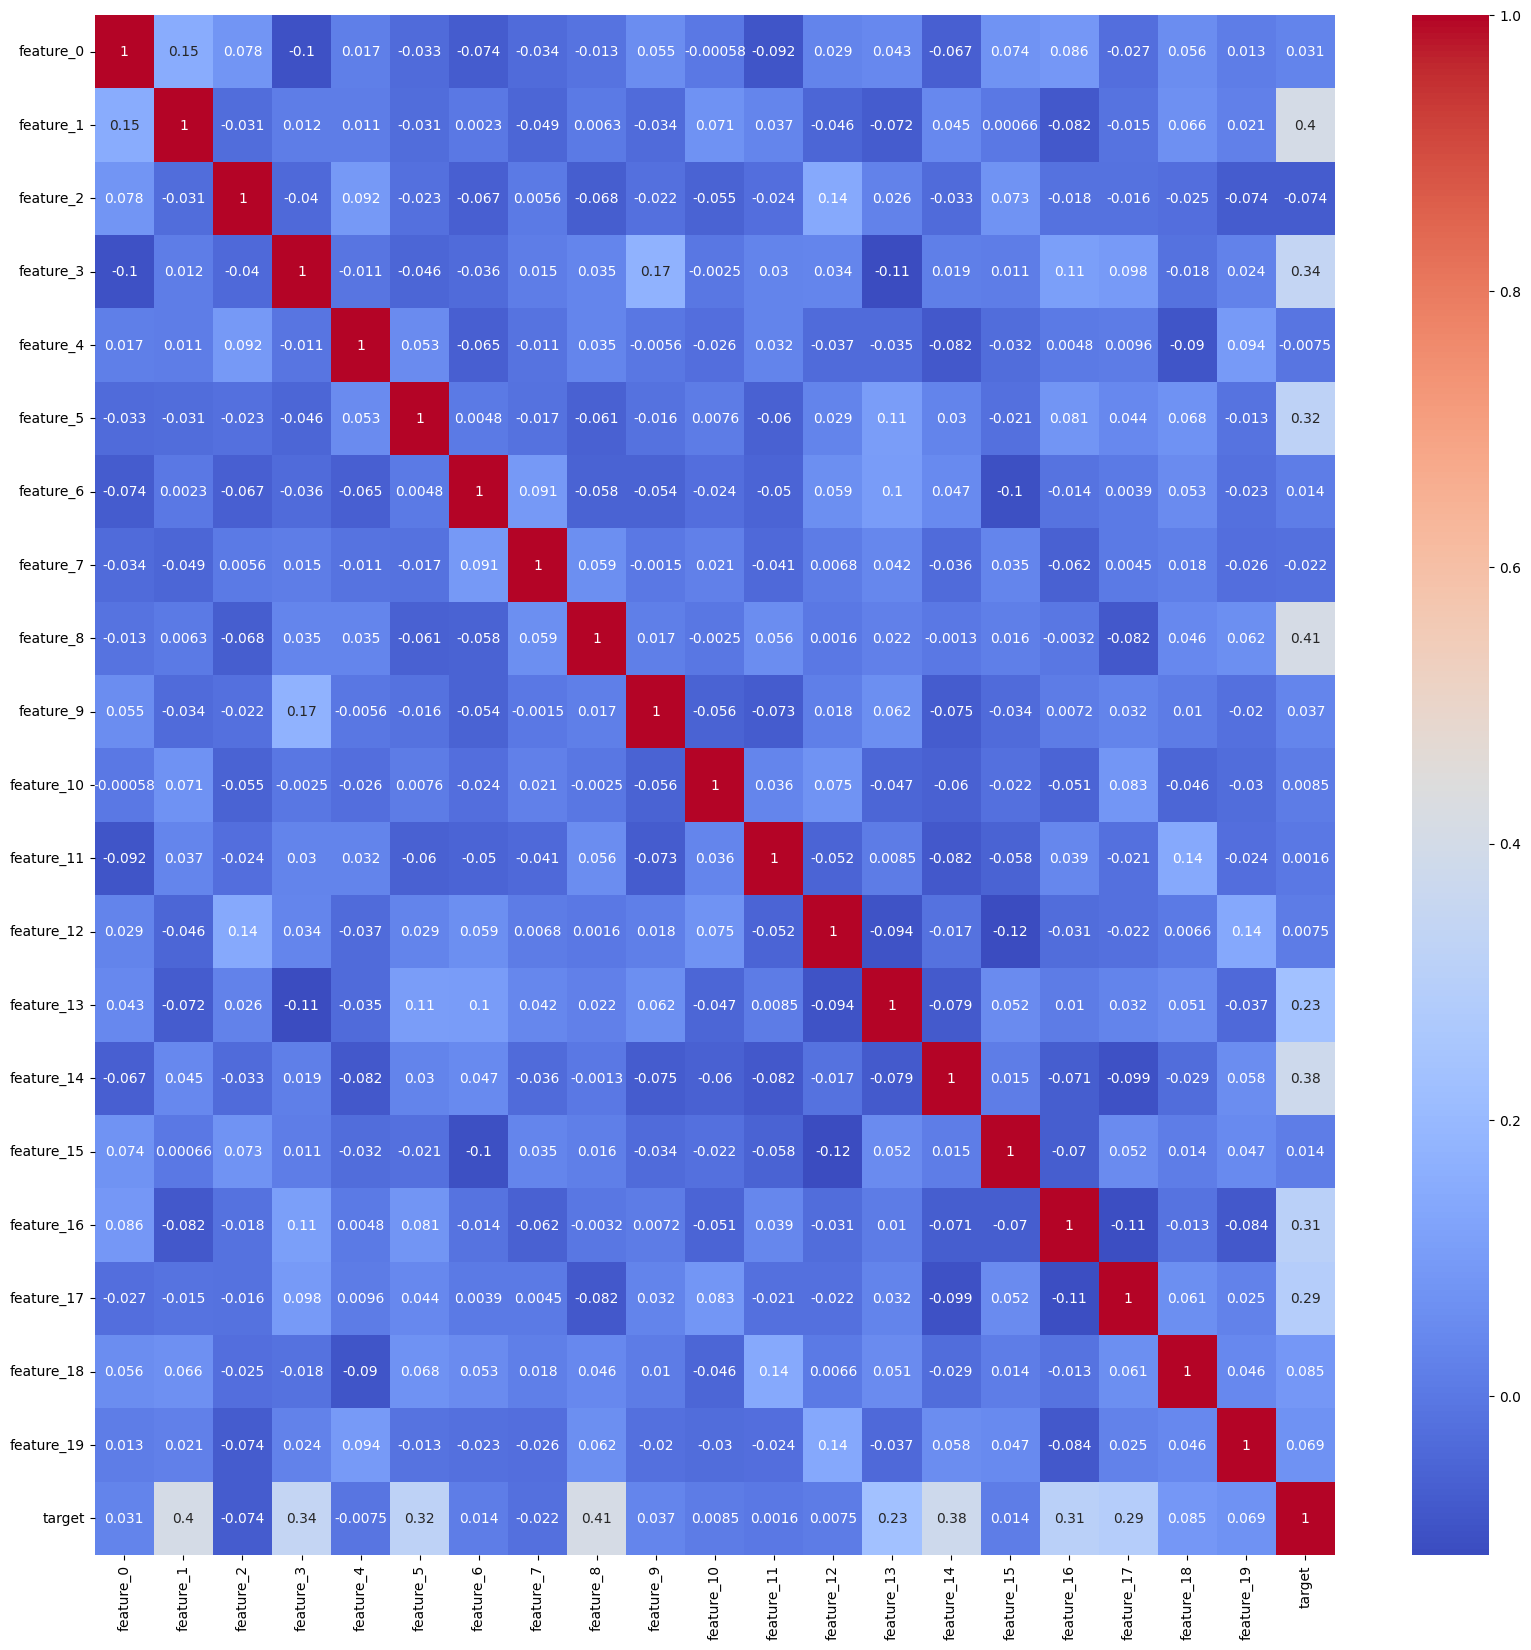

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20)) # Increase the figure size
sns.heatmap(data_for_pairplot.corr(), annot=True, cmap='coolwarm')

## PCA Analysis and Scree Plot

Before applying PCR, let's perform a Principal Component Analysis (PCA) on the scaled features to understand the variance explained by each principal component. A scree plot will help visualize this and inform the choice of the number of components.

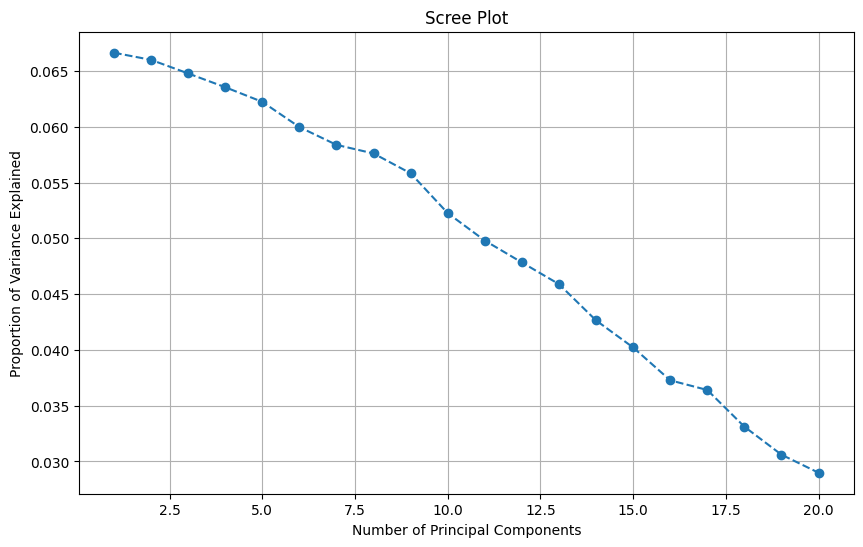

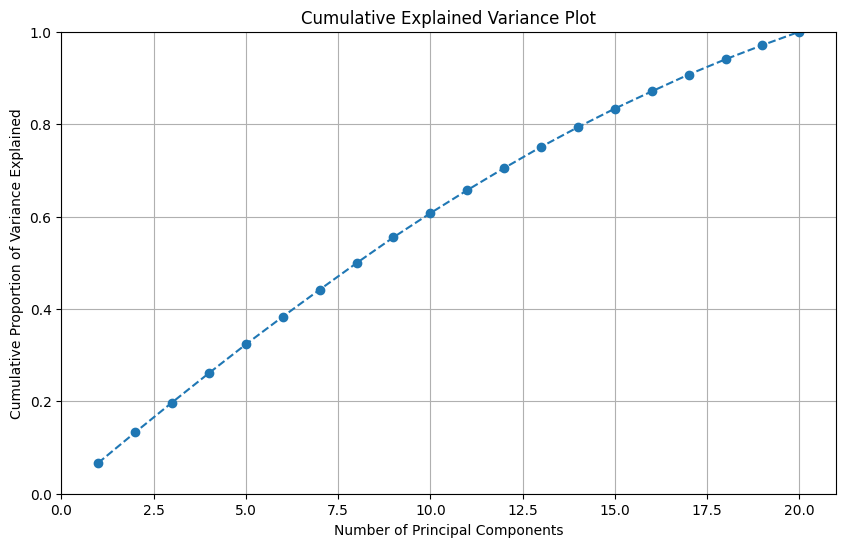

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Scale the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()

# Plot the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.axis([0, len(cumulative_explained_variance) + 1, 0, 1])
plt.grid(True)
plt.show()

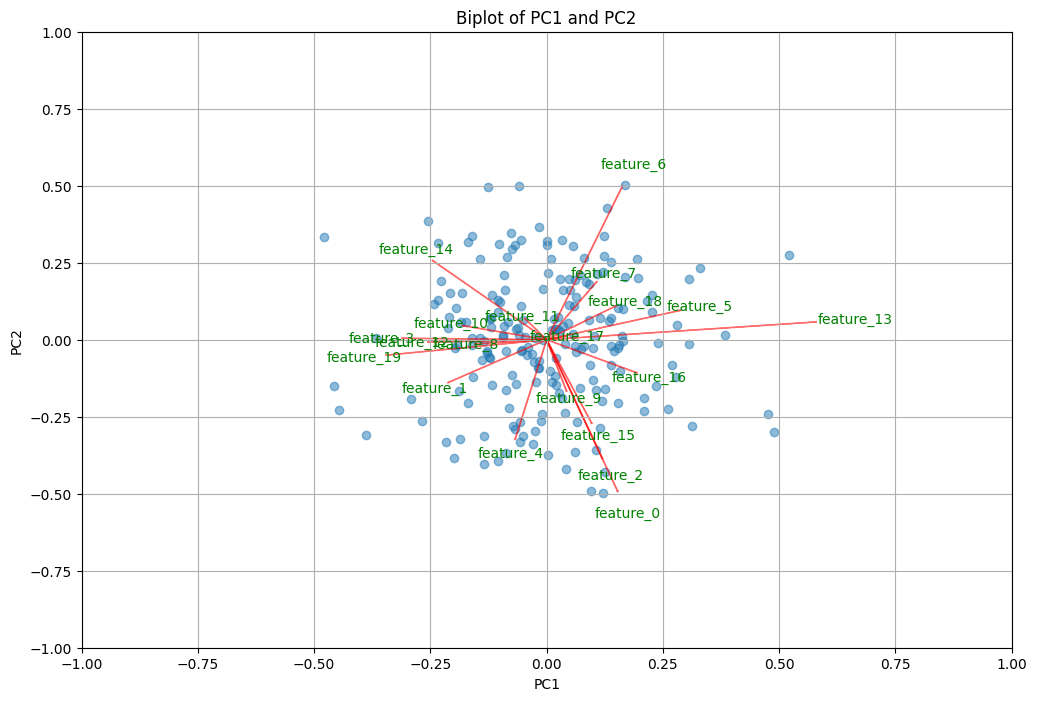

In [ ]:
# Add a biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(12, 8))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Get the PCA scores (transformed data) and loadings (coefficients)
pca_scores = pca.transform(X_scaled)
pca_loadings = pca.components_.T # Transpose to get loadings for each PC

# Get the original feature names (assuming they are 'feature_0', 'feature_1', ...)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Create the biplot
biplot(pca_scores[:, 0:2], pca_loadings[:, 0:2], labels=feature_names)
plt.title('Biplot of PC1 and PC2')
plt.show()

## Applying pcr and pls



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Split the generated dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create a PCR pipeline
# We'll choose a number of components for demonstration purposes.
# In practice, this would be tuned using cross-validation.
n_components_pca = 2 # Example number of components for PCA
pcr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components_pca)),
    ('linear_regression', LinearRegression())
])

# 4. Create a PLS pipeline
# Similarly, choose a number of components for demonstration.
n_components_pls = 2 # Example number of components for PLS
pls_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pls_regression', PLSRegression(n_components=n_components_pls))
])

# 5. Fit both pipelines to the training data
pcr_pipeline.fit(X_train, y_train)
pls_pipeline.fit(X_train, y_train)

# 6. Make predictions on the test data
y_pred_pcr_train = pcr_pipeline.predict(X_train)
y_pred_pls_train = pls_pipeline.predict(X_train)
y_pred_pcr_test = pcr_pipeline.predict(X_test)
y_pred_pls_test = pls_pipeline.predict(X_test)

# 8. Calculate and print evaluation metrics
mse_pcr_train = mean_squared_error(y_train, y_pred_pcr_train)
r2_pcr_train = r2_score(y_train, y_pred_pcr_train)

mse_pls_train = mean_squared_error(y_train, y_pred_pls_train)
r2_pls_train = r2_score(y_train, y_pred_pls_train)


mse_pcr_test = mean_squared_error(y_test, y_pred_pcr_test)
r2_pcr_test = r2_score(y_test, y_pred_pcr_test)

mse_pls_test = mean_squared_error(y_test, y_pred_pls_test)
r2_pls_test = r2_score(y_test, y_pred_pls_test)




print(f"PCR Model Performance training data (with {n_components_pca} components):")
print(f"  Mean Squared Error (MSE): {mse_pcr_train:.2f}")
print(f"  R-squared (R2): {r2_pcr_train:.2f}")
print("-" * 30)
print(f"PLS Model Performance training data (with {n_components_pls} components):")
print(f"  Mean Squared Error (MSE): {mse_pls_train:.2f}")
print(f"  R-squared (R2): {r2_pls_train:.2f}")

print("-" * 60)

print(f"PCR Model Performance test data (with {n_components_pca} components):")
print(f"  Mean Squared Error (MSE): {mse_pcr_test:.2f}")
print(f"  R-squared (R2): {r2_pcr_test:.2f}")
print("-" * 30)
print(f"PLS Model Performance test data (with {n_components_pls} components):")
print(f"  Mean Squared Error (MSE): {mse_pls_test:.2f}")
print(f"  R-squared (R2): {r2_pls_test:.2f}")


PCR Model Performance training data (with 2 components):
  Mean Squared Error (MSE): 192.74
  R-squared (R2): 0.03
------------------------------
PLS Model Performance training data (with 2 components):
  Mean Squared Error (MSE): 0.65
  R-squared (R2): 1.00
------------------------------------------------------------
PCR Model Performance test data (with 2 components):
  Mean Squared Error (MSE): 155.96
  R-squared (R2): 0.05
------------------------------
PLS Model Performance test data (with 2 components):
  Mean Squared Error (MSE): 0.96
  R-squared (R2): 0.99


### Visualize the data

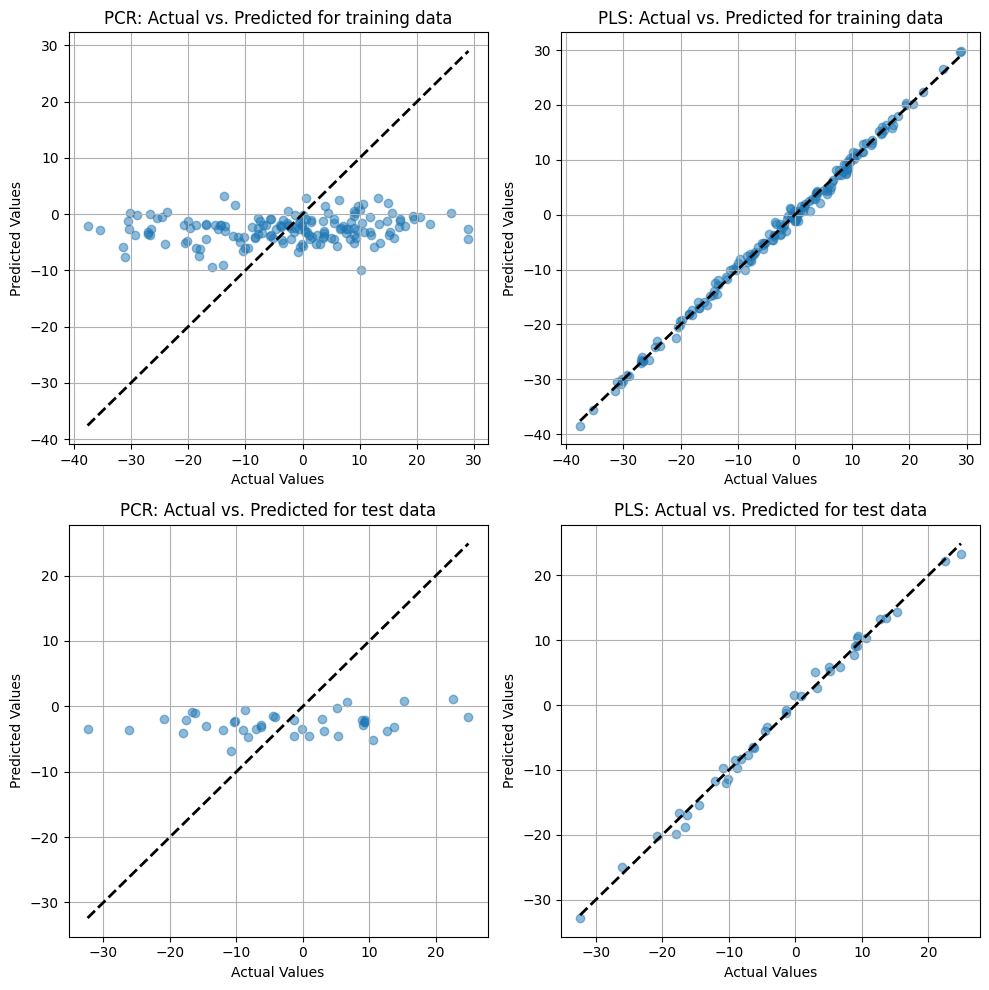

In [ ]:
import matplotlib.pyplot as plt


# Plotting actual vs. predicted values for PCR
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_pred_pcr_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PCR: Actual vs. Predicted for training data")
plt.grid(True)

# Plotting actual vs. predicted values for PLS
plt.subplot(2, 2, 2)
plt.scatter(y_train, y_pred_pls_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PLS: Actual vs. Predicted for training data")
plt.grid(True)

# Plotting actual vs. predicted values for PCR
#plt.figure(figsize=(10, 5))
plt.subplot(2,2,3)
plt.scatter(y_test, y_pred_pcr_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PCR: Actual vs. Predicted for test data")
plt.grid(True)

# Plotting actual vs. predicted values for PLS
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_pls_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PLS: Actual vs. Predicted for test data")
plt.grid(True)

plt.tight_layout()
plt.show()

### Model Performance and Interpretation

We applied both PCR and PLS regression to the generated dataset and evaluated their performance using Mean Squared Error (MSE) and R-squared (R2) on the test set.

Let's look at the results, and compare the Mean Squared Error (MSE) and the R-squared (R2) for the two cases

#### Interpreting the Metrics

*   **Mean Squared Error (MSE):** This measures the average of the squared differences between the actual target values and the predicted target values. Lower MSE indicates better prediction accuracy.
*   **R-squared (R2):** This represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R2 ranges from 0 to 1. A higher R2 indicates that the model explains a larger proportion of the variance in the target variable, meaning it fits the data better. An R2 of 1 means the model perfectly predicts the target variable.

#### Discussion of Performance

In this specific example, the **PLS model performed significantly better** than the PCR model based on both metrics. The PLS model achieved a very low MSE and an R2 very close to 1.00, suggesting it was able to predict the target variable almost perfectly on the test set. The PCR model, while explaining some variance, had a much higher MSE, indicating less accurate predictions.

This difference in performance is due to how the components are selected. The generated dataset was designed to have a structure where the directions in the feature space that are most correlated with the target variable (which PLS focuses on) are different from the directions that simply explain the most variance in the features (which PCA/PCR focuses on).

#### The Role of the Number of Components

The number of components (`n_components`) chosen for both PCA (in PCR) and PLS is a crucial parameter.

*   **Too few components:** The model might not capture enough information from the original features, leading to underfitting and poor performance.
*   **Too many components:** The model might start to capture noise or become too specific to the training data, potentially leading to overfitting. In PCR, including too many components (especially those with low variance) might reintroduce multicollinearity issues if they still have some correlation with each other or with the target in complex ways.

Choosing the optimal number of components is typically done through techniques like **cross-validation**. You would train and evaluate the model with different numbers of components on subsets of your training data and choose the number that gives the best performance (e.g., lowest MSE or highest R2) on a validation set.




## Investigating the Number of Components

Let's investigate how the number of components affects the performance of both PCR and PLS models. We will train and evaluate the models with a varying number of components and plot the Mean Squared Error (MSE) and R-squared (R2) against the number of components.

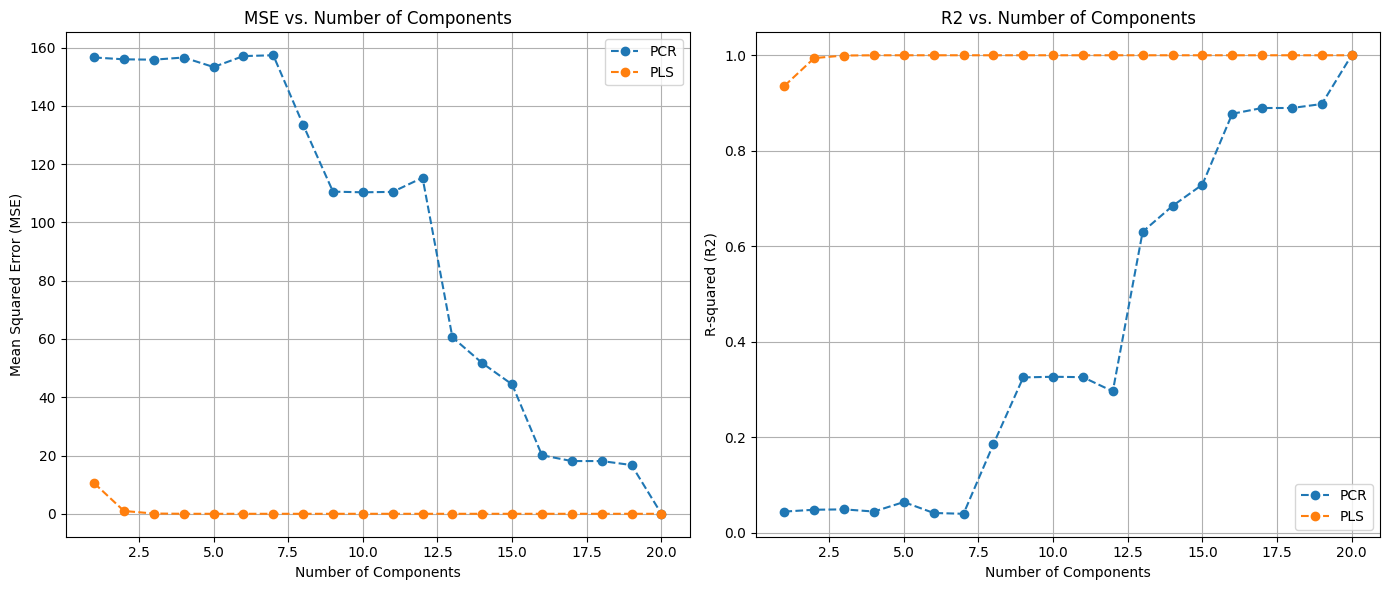

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of number of components to test
max_components = X_train.shape[1]
n_components_range = range(1, max_components + 1)

# Initialize lists to store metrics
mse_pcr_list = []
r2_pcr_list = []
mse_pls_list = []
r2_pls_list = []

# Iterate through the range of number of components
for n in n_components_range:
    # PCR Pipeline
    pcr_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('linear_regression', LinearRegression())
    ])
    pcr_pipeline.fit(X_train, y_train)
    y_pred_pcr = pcr_pipeline.predict(X_test)
    mse_pcr_list.append(mean_squared_error(y_test, y_pred_pcr))
    r2_pcr_list.append(r2_score(y_test, y_pred_pcr))

    # PLS Pipeline
    pls_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pls_regression', PLSRegression(n_components=n))
    ])
    pls_pipeline.fit(X_train, y_train)
    y_pred_pls = pls_pipeline.predict(X_test)
    mse_pls_list.append(mean_squared_error(y_test, y_pred_pls))
    r2_pls_list.append(r2_score(y_test, y_pred_pls))

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, mse_pcr_list, marker='o', linestyle='--', label='PCR')
plt.plot(n_components_range, mse_pls_list, marker='o', linestyle='--', label='PLS')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Components')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_components_range, r2_pcr_list, marker='o', linestyle='--', label='PCR')
plt.plot(n_components_range, r2_pls_list, marker='o', linestyle='--', label='PLS')
plt.xlabel('Number of Components')
plt.ylabel('R-squared (R2)')
plt.title('R2 vs. Number of Components')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Interpreting Coefficients and Loadings (Briefly)

While a deep dive into interpreting the coefficients and loadings for complex datasets is difficult. Here's a basic idea:

*   **PCR:** The final linear regression model has coefficients for the *principal components*, not the original features. To understand the impact on original features, you would need to look at the PCA loadings (how original features contribute to the principal components) and the regression coefficients for the components. This can be complex.
*   **PLS:** The PLS model directly provides coefficients that relate the *original features* to the target variable through the PLS components. These coefficients can give you a sense of which original features are most important for the prediction, as PLS components are constructed to be predictive of the target. In essence, PLS combines the dimension reduction and the regression steps in a way that makes the relationship between original features and the target more direct via the predictive components.

The key takeaway is that PLS components are designed with the target variable in mind, often making the connection back to the original features for prediction purposes more intuitive than with PCR's purely feature-variance-based components.

## Should we always choose PLS?



1. **When the principal components that explain the most variance in X are also highly correlated with y:** In some datasets, the directions in the feature space where the data varies the most happen to be the same directions that are most relevant for predicting the target variable. In this scenario, PCR's approach of focusing on feature variance aligns well with the predictive task, and it might perform as well as or even better than PLS, which has a more complex component extraction process.

2. **When interpreting the structure of X is a primary goal:** If the main objective is to understand the underlying structure and relationships within the features themselves, rather than solely focusing on prediction, PCA (the first step of PCR) is designed for this purpose. The principal components might offer more intuitive interpretations in terms of the original features compared to PLS components, which are constructed with both X and y in mind.

3. **Simplicity and Stability:** PCR separates the dimension reduction step (PCA) from the regression step. PCA is a well-established and stable technique. This separation can sometimes make PCR conceptually simpler and its results more stable, especially in certain edge cases or with specific data structures.

4. **Preventing Overfitting in Certain Cases:** While PLS is designed to be predictive, if the relationship between X and y is weak or complex, PLS might struggle to find truly predictive components and could potentially overfit by trying to force a relationship. In such cases, PCR, by focusing on the robust variance structure of X, might provide a more stable and less overfitted model, even if its predictive performance isn't outstanding.

5. **Computational Efficiency:** For very large datasets, performing PCA might sometimes be computationally faster than the iterative algorithm used in PLS, although this difference might be negligible with modern computing power and optimized libraries.

In summary, while PLS often shines in predictive tasks by explicitly considering the target variable, PCR can be superior when the directions of maximum feature variance are also the most predictive, when understanding the feature structure is important, or when a simpler and more stable approach is preferred. It's always recommended to try both methods and compare their performance using appropriate cross-validation techniques to determine which works best for a specific dataset.

##Summary
We've explored Principal Component Regression (PCR) and Partial Least Squares (PLS) Regression as powerful techniques to handle challenges like **multicollinearity** and **high-dimensional data** in regression.

Here are the key takeaways:

*   **Why Use Them?** Both methods address the limitations of standard linear regression when features are numerous and correlated. They do this by creating a smaller set of new, uncorrelated components from the original features.
*   **The Core Difference:** The fundamental distinction lies in how they create these components:
    *   **PCR:** Uses Principal Component Analysis (PCA) to find components that explain the **maximum variance in the original features (X)**, without considering the response variable (y). It's like finding the directions where the input data spreads out the most.
    *   **PLS:** Finds components that maximize the **covariance (or correlation) between the features (X) and the response variable (y)**. It's like finding the directions in the input data that are most strongly related to the output we want to predict.
*   **Trade-offs:**
    *   **PCR** is conceptually simpler and its component extraction is independent of the response. However, it might include components that explain a lot of feature variance but are irrelevant for prediction.
    *   **PLS** directly focuses on predictive power by considering the response when building components. It often leads to better prediction performance, but the components can be harder to interpret in terms of the original features.
*   **When to Choose:**
    *   Choose **PCR** if your primary goal is to understand the underlying structure and variance within your features, and you believe the directions of maximum feature variance are relevant for your prediction task.
    *   Choose **PLS** if your main objective is to achieve the **best possible prediction accuracy**, and you want a method that explicitly targets the relationship between your features and the response.

In summary, PCR is excellent for summarizing feature variance, while PLS is excellent for finding components that are most useful for predicting your target variable. By understanding how each method works and their core differences, you can make an informed decision about which technique is best suited for your specific regression problem and goals.

